![AES-774 Masthead](http://kyrill.ias.sdsmt.edu/wjc/eduresources/AES_744_Masthead.png)

# WRF Namelist Reading and Plotting Script

## Overview

There are a couple resources that now help users define spatial regions for WRF by pointing and clicking on a map interface.  One is an interface that runs through [QGIS](https://qgis.org/en/site/forusers/download.html), an open source GIS resource.  (I recommend getting the Long-Term Release [LTR] version.)  The tool is [GIS4WRF](https://gis4wrf.github.io). I was skeptical of it at first, it's a little clunky and does a lot more than I personally need, but I find it to be an improvement over previous GUI WRF setups.  Specifically the GIS4WRF build the domains from the innermost domains outward which provides far more precision than other domain, creating tools.

But to make simple professional plots, you may want another resource.

This script presumes that you already have a namelist.wps file and you can cut and paste the critical contents of the file, and make some small format tweaks for it to work.

It will then render the domains onto the native WRF projection (or other projection, e.g., Mercator, or "Plate Carrée" (aka "Geographic" or "Lat-Lon").  

You have the option to also have map backgrounds to contexutalize your selected region w.r.t. topography, places of interest, roads, rivers, water bodies, etc.

## Libraries

For this resource we will need the following libraries.


* [NumPy](https://numpy.org): our standard numerical manager in python
* [MatPlotLib](https://matplotlib.org)'s PyPlot and a few other features
* [CartoPy](https://scitools.org.uk/cartopy/docs/latest/): A map projection library.  We are specifically requesting the following sublibaries
   *  [CartoPy.crs](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html) [Cartopy's Coordiate Reference System (CRS)](https://en.wikipedia.org/wiki/Spatial_reference_system) operators.  This is the information needed to draw the various projection.
   *  [CartoPy.crs]()
   *  [CartoPy.feature]()
   *  [CartoPy.io]()
   *  [CartoPy.mpl]()   
* [wrf-python](https://wrf-python.readthedocs.io/en/latest/#) the WRF-Python Library (we probably could do this in a more clever way but since you probably already have it installed, let's aim for maximum satisfaction with minimal effort).



In [15]:
##############################################
#
# Library
#

import numpy                as np
import matplotlib.pyplot    as plt

import cartopy.crs          as ccrs  
import cartopy.feature      as cfeature
import cartopy.io.img_tiles as cimgt
import cartopy.mpl          as cmpl

import wrf                  as wrf 

#
##############################################

## Import Name List Information

We are assuming that you already have a *namelist.wps* file ready and you are looking for a way to create a professional map out of what you already have.

In [13]:


# Enter Expected Values from your Namelist Files

parent_grid_ratio = [1,     3,    3]

i_parent_start    = [1,    44,   40]
j_parent_start    = [1,    51,   30]



e_we              = [150,   190,  169]
e_sn              = [150,   148,  190]

dx                = 9000.
dy                = 9000.


map_proj          = 'lambert'


ref_lat           = 44.47
ref_lon           = -102.75



truelat1          = 44.47
truelat2          = 44.47

stand_lon         = -102.75


projdict     = {'lambert':  1, 
                'polar':    2, 
                'mercator': 3, 
                'lat-lon':  6}

map_proj     = projdict[map_proj]



moad_cen_lat = np.average([truelat1,
                           truelat2])




if (ref_lat >=0):
    pole_lat = 90
else:
    pole_lat = -90.

n_domains         = len(e_we)

dx_arr            = np.empty(n_domains)
dy_arr            = np.empty(n_domains)

dx_arr[0] = dx
dy_arr[0] = dy

for i in range(1,n_domains):
    dx_arr[i] = dx_arr[i-1] / parent_grid_ratio[i]
    dy_arr[i] = dy_arr[i-1] / parent_grid_ratio[i]


## Get Projection Generic Parameters 


# Package as a WRFProj Object




if   (map_proj == 1):
     wrf_projection_data = wrf.LambertConformal(TRUELAT1     =  truelat1,
                                                TRUELAT2     =  truelat2,
                                                MOAD_CEN_LAT = moad_cen_lat,
                                                STAND_LON    =    stand_lon,
                                                POLE_LAT     =     pole_lat,
                                                POLE_LON     =          0.0)
        
elif (map_proj == 2):
    wrf_projection_data = wrf.PolarStereographic(TRUELAT1     =     truelat1,
                                                 TRUELAT2     =     truelat2,
                                                 MOAD_CEN_LAT = moad_cen_lat,
                                                 STAND_LON    =    stand_lon,
                                                 POLE_LAT     =     pole_lat,
                                                 POLE_LON     =          0.0)


elif (map_proj == 3):
    wrf_projection_data = wrf.Mercator(TRUELAT1     =     truelat1,
                                       TRUELAT2     =     truelat2,
                                       MOAD_CEN_LAT = moad_cen_lat,
                                       STAND_LON    =    stand_lon,
                                       POLE_LAT     =     pole_lat,
                                       POLE_LON     =          0.0)
else:
    wrf_projection_data = wrf.LatLon(TRUELAT1     =     truelat1,
                                     TRUELAT2     =     truelat2,
                                     MOAD_CEN_LAT = moad_cen_lat,
                                     STAND_LON    =    stand_lon,
                                     POLE_LAT     =     pole_lat,
                                     POLE_LON     =          0.0)

    
wrf_projection_data = wrf.LambertConformal(TRUELAT1     =     truelat1,
                                           TRUELAT2     =     truelat2,
                                           MOAD_CEN_LAT = moad_cen_lat,
                                           STAND_LON    =    stand_lon,
                                           POLE_LAT     =     pole_lat,
                                           POLE_LON     =          0.0)


wrf_proj4 = wrf_projection_data.proj4()
wrf_crs   = wrf_projection_data.cartopy()






In [14]:
display('Proj4: %s' %wrf_proj4)
display(wrf_crs)

lonlat_crs = ccrs.PlateCarree()
display(lonlat_crs)

mercator_crs = ccrs.Mercator()
display(mercator_crs)



'Proj4: +proj=lcc +units=m +a=6370000.0 +b=6370000.0 +lat_1=44.47 +lat_2=44.47 +lat_0=44.47 +lon_0=-102.75 +nadgrids=@null'

<Bound CRS: +proj=lcc +a=6370000.0 +b=6370000.0 +nadgrids=@nul ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown to WGS84
- method: NTv2
Datum: unknown using nadgrids=@null
- Ellipsoid: unknown
- Prime Meridian: Greenwich
Source CRS: unknown

<Derived Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Derived Projected CRS: +proj=merc +ellps=WGS84 +lon_0=0.0 +x_0=0.0 +y_0=0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Mercator (variant A)
Datum: Unknown based on WGS84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
# pull extents of each domain's arakawa grid

center_wrf = wrf_crs.transform_points(lonlat_crs,np.array(ref_lon),np.array(ref_lat))[0:1]



eastings_limits_ll_ur       = np.zeros([2,n_domains])
eastings_limits_ll_ur[:,0]  = center_wrf[0,0]+[- (e_we[0]-1)/2 * dx, (e_we[0]+1)/2 * dx]


northings_limits_ll_ur      = np.zeros([2,n_domains])
northings_limits_ll_ur[:,0] = center_wrf[0,1]+[- (e_sn[0]-1)/2 * dy, (e_sn[0]+1)/2 * dy]



print("------")
print("Domain ",(1), "Unstaggared Domain Corners")
print(lonlat_crs.transform_points(wrf_crs,
                 np.array([ eastings_limits_ll_ur[0,0],  eastings_limits_ll_ur[0,0],  eastings_limits_ll_ur[1,0],  eastings_limits_ll_ur[1,0]]),
                 np.array([northings_limits_ll_ur[0,0], northings_limits_ll_ur[1,0], northings_limits_ll_ur[1,0], northings_limits_ll_ur[0,0]])))

eastings_100_wrf  = np.empty([100,n_domains], dtype=np.float32)
northings_100_wrf = np.empty([100,n_domains], dtype=np.float32)

box_x_wrf         = np.empty([400,n_domains], dtype=np.float32)
box_y_wrf         = np.empty([400,n_domains], dtype=np.float32)  

eastings_100_wrf[:,0]  = np.linspace(eastings_limits_ll_ur[0,0],
                                     eastings_limits_ll_ur[1,0],
                                     100)

northings_100_wrf[:,0] = np.linspace(northings_limits_ll_ur[0,0],
                                     northings_limits_ll_ur[1,0],
                                     100) 

box_x_wrf[  0:100,0] = eastings_100_wrf[:,0]
box_x_wrf[100:200,0] = eastings_limits_ll_ur[1,0]
box_x_wrf[200:300,0] = np.flip(eastings_100_wrf[:,0])
box_x_wrf[300:400,0] = eastings_limits_ll_ur[0,0]


box_y_wrf[  0:100,0] = northings_limits_ll_ur[0,0]
box_y_wrf[100:200,0] = northings_100_wrf[:,0]
box_y_wrf[200:300,0] = northings_limits_ll_ur[1,0]
box_y_wrf[300:400,0] = np.flip(northings_100_wrf[:,0]) 



for i in range(1, n_domains):
    eastings_limits_ll_ur[0,i]  = eastings_limits_ll_ur[0,i-1]  + (i_parent_start[i]-1)*dx_arr[i-1]
    eastings_limits_ll_ur[1,i]  = eastings_limits_ll_ur[0,i]  + (e_we[i]-1.0)*dx_arr[i] 

    northings_limits_ll_ur[0,i] = northings_limits_ll_ur[0,i-1] + (j_parent_start[i]-1)*dy_arr[i-1]
    northings_limits_ll_ur[1,i] = northings_limits_ll_ur[0,i] + (e_sn[i]-1.0)*dy_arr[i] 
    
    eastings_100_wrf[:,i]  = np.linspace(eastings_limits_ll_ur[0,i],
                                         eastings_limits_ll_ur[1,i],
                                         100)
    
    northings_100_wrf[:,i] = np.linspace(northings_limits_ll_ur[0,i],
                                         northings_limits_ll_ur[1,i],
                                         100)    
    
    box_x_wrf[  0:100,i] = eastings_100_wrf[:,i]
    box_x_wrf[100:200,i] = eastings_limits_ll_ur[1,i]
    box_x_wrf[200:300,i] = np.flip(eastings_100_wrf[:,i])
    box_x_wrf[300:400,i] = eastings_limits_ll_ur[0,i]

    
    box_y_wrf[  0:100,i] = northings_limits_ll_ur[0,i]
    box_y_wrf[100:200,i] = northings_100_wrf[:,i]
    box_y_wrf[200:300,i] = northings_limits_ll_ur[1,i]
    box_y_wrf[300:400,i] = np.flip(northings_100_wrf[:,i]) 
    
    print("------")
    print("Domain ",(i+1), "Unstaggared Domain Corners")
    
    print(lonlat_crs.transform_points(wrf_crs,
                     np.array([ eastings_limits_ll_ur[0,i],  eastings_limits_ll_ur[0,i],  eastings_limits_ll_ur[1,i],  eastings_limits_ll_ur[1,i]]),
                     np.array([northings_limits_ll_ur[0,i], northings_limits_ll_ur[1,i], northings_limits_ll_ur[1,i], northings_limits_ll_ur[0,i]])))


    



# Reproject the WRF Box Points.  You need to cut off the "z" mapping coordinates
#   from the two

box_x_mercator =  mercator_crs.transform_points(wrf_crs,box_x_wrf,box_y_wrf)[:,:,0]
box_y_mercator =  mercator_crs.transform_points(wrf_crs,box_x_wrf,box_y_wrf)[:,:,1]


box_x_lonlat   =  lonlat_crs.transform_points(wrf_crs,box_x_wrf,box_y_wrf)[:,:,0]
box_y_lonlat   =  lonlat_crs.transform_points(wrf_crs,box_x_wrf,box_y_wrf)[:,:,1]
print(" ")



------
Domain  1 Unstaggared Domain Corners
[[-110.38741629   38.16972481    0.        ]
 [-112.14806946   50.2250148     0.        ]
 [ -93.2269116    50.21572057    0.        ]
 [ -95.01067491   38.16217073    0.        ]]
------
Domain  2 Unstaggared Domain Corners
[[-106.2038233    42.43326086    0.        ]
 [-106.4464878    46.39531617    0.        ]
 [ -99.0535122    46.39531617    0.        ]
 [ -99.2961767    42.43326086    0.        ]]
------
Domain  3 Unstaggared Domain Corners
[[-104.80587308   43.25048556    0.        ]
 [-104.86624333   44.94982019    0.        ]
 [-102.73093049   44.96919394    0.        ]
 [-102.73147472   43.2693031     0.        ]]
 


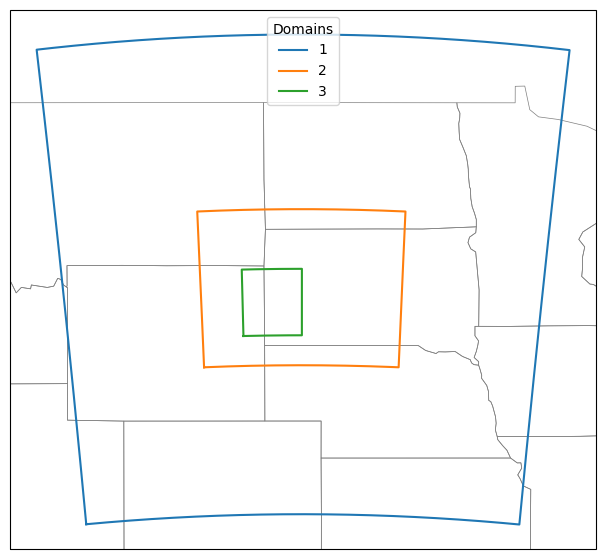

In [5]:
#######################################
#
# What is my data
#

fig = plt.figure(figsize=(11, 7))

# add a plot element just one field aka the "Axes"

ax = fig.add_subplot(1,  # nrows
                     1,  # ncols 
                     1,  # index of figure you're installing
                     projection = mercator_crs) # cartopy CRS Projection


ax.plot(box_x_wrf[:,:],box_y_wrf[:,:], transform=wrf_crs)


ax.coastlines(linewidths =  0.75)

ax.add_feature(cfeature.STATES.with_scale('110m'), 
                   linewidths = 0.5,
                   facecolor  = 'none', 
                   edgecolor  = 'tab:gray')

plt.legend(np.linspace(1,n_domains,n_domains).astype("int"),
           title = "Domains")

plt.show()

#
#######################################

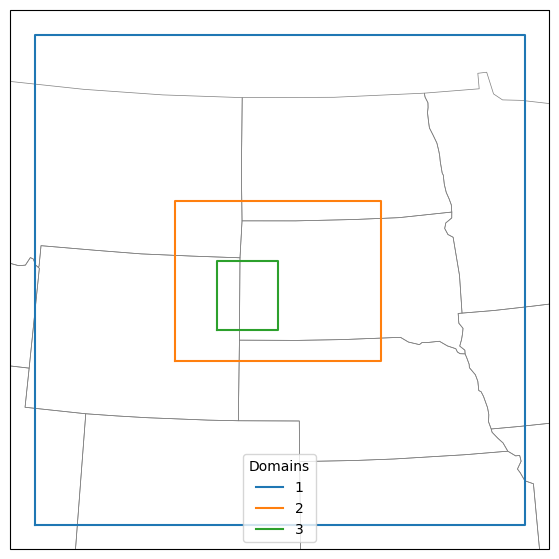

In [6]:
fig = plt.figure(figsize=(11, 7))

# add a plot element just one field aka the "Axes"

ax = fig.add_subplot(1,  # nrows
                     1,  # ncols 
                     1,  # index of figure you're installing
                     projection = wrf_crs) # cartopy CRS Projection


ax.plot(box_x_wrf[:,:],box_y_wrf[:,:], transform=wrf_crs)


ax.coastlines(linewidths =  0.75)

ax.add_feature(cfeature.STATES.with_scale('110m'), 
                   linewidths = 0.5,
                   facecolor  = 'none', 
                   edgecolor  = 'tab:gray')

plt.legend(np.linspace(1,n_domains,n_domains).astype("int"),
           title = "Domains")

plt.show()

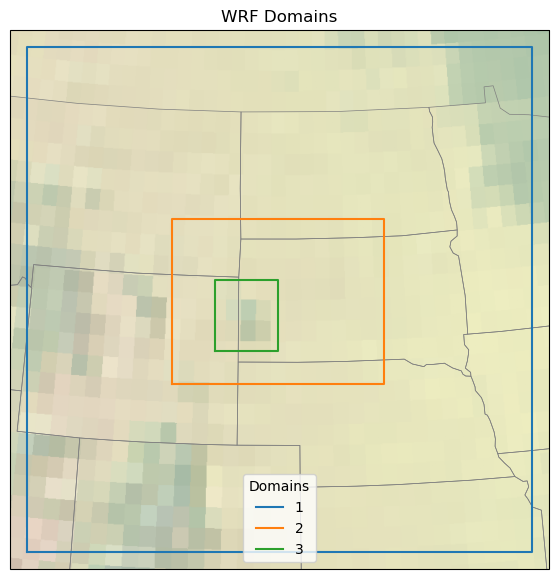

In [7]:
fig = plt.figure(figsize=(11, 7))

# add a plot element just one field aka the "Axes"

ax = fig.add_subplot(1,  # nrows
                     1,  # ncols 
                     1,  # index of figure you're installing
                     projection = wrf_crs) # cartopy CRS Projection

ax.set_xlim([(box_x_wrf[:,0].min() - 5*dx_arr[0]),
             (box_x_wrf[:,0].max() + 5*dx_arr[0])])

ax.set_ylim([(box_y_wrf[:,0].min() - 5*dy_arr[0]),
             (box_y_wrf[:,0].max() + 5*dy_arr[0])])



ax.coastlines(linewidths =  0.75)

ax.add_feature(cfeature.STATES.with_scale('110m'), 
                   linewidths = 0.5,
                   facecolor  = 'none', 
                   edgecolor  = 'tab:gray')

ax.stock_img()

plt.plot(box_x_wrf,
         box_y_wrf)

plt.legend(np.linspace(1,n_domains,n_domains).astype("int"),
           title = "Domains")

plt.title("WRF Domains")
plt.show()


+proj=lcc +a=6370000.0 +b=6370000.0 +nadgrids=@null +lon_0=-102.75 +lat_0=44.47 +x_0=0.0 +y_0=0.0 +lat_1=44.47 +lat_2=44.47 +no_defs +type=crs


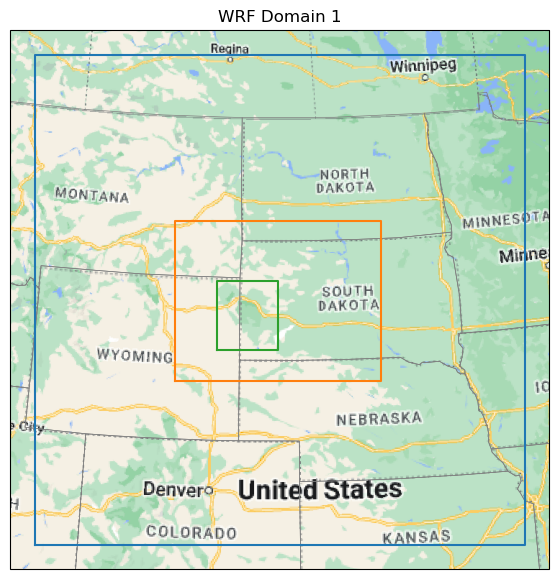

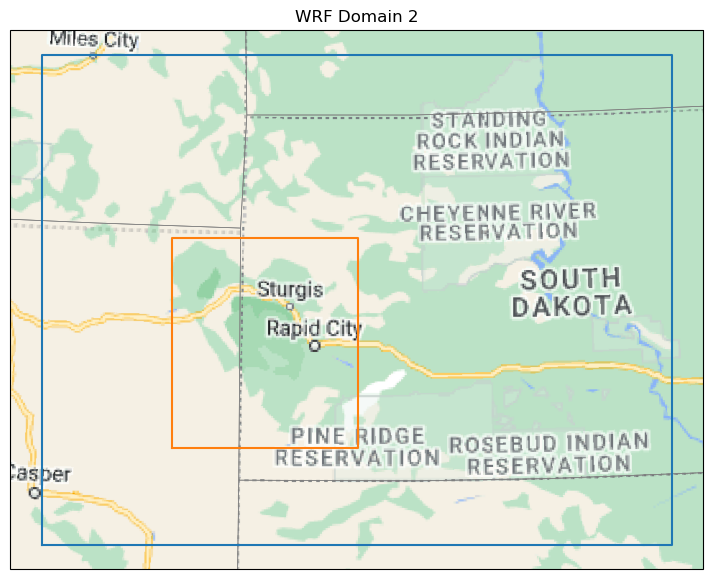

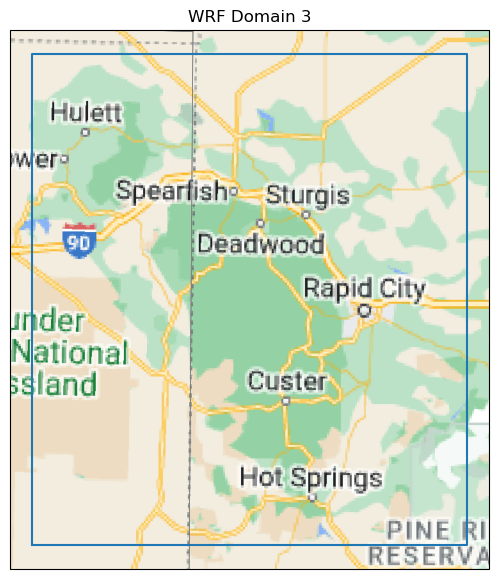

In [8]:

print(wrf_crs)
for i in range(0, n_domains) : 


    fig = plt.figure(figsize=(11, 7))
    
    

    

    # add a plot element just one field aka the "Axes"

    ax = fig.add_subplot(1,  # nrows
                         1,  # ncols 
                         1,  # index of figure you're installing
                         projection = wrf_crs) # cartopy CRS Projection



    ax.autoscale_view()
    
    tiler = cimgt.GoogleTiles()
    
    ax.add_image(tiler ,(i+8-3))

    ax.coastlines(linewidths =  0.75)

    ax.add_feature(cfeature.STATES.with_scale('110m'), 
                       linewidths = 0.5,
                       facecolor  = 'none', 
                       edgecolor  = 'tab:gray')


    
    plt.plot(box_x_wrf[:,i:], box_y_wrf[:,i:], transform=wrf_crs)


    
    plt.title("WRF Domain " + str(i+1))



    plt.show()

